In [12]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
dicts = []
for p in os.listdir("results"):
    dicts.append(json.load(open(f"results/{p}")))

m = []
d = []
ns = []
nf = []
r20 = []
r50 = []
n100 = []
train_time = []
for di in dicts:
    d.append(round(100 * 2 * di["model"]["model_specific"]["target_density"], 2))
    m.append(di["model"]["general"]["model"])
    ns.append(di["model"]["model_specific"]["ainv_params"]["umr_scans"])
    nf.append(di["model"]["model_specific"]["ainv_params"]["umr_finetune_steps"])
    r20.append(round(di["results"]["20"]["recall"]["mean"], 3))
    r50.append(round(di["results"]["50"]["recall"]["mean"], 3))
    n100.append(round(di["results"]["100"]["ndcg"]["mean"], 3))
    train_time.append(round(di["performance"]["time"]["construct_weights_time"], 2))


df = pd.DataFrame(
    {
        "model": m,
        "d (%)": d,
        "ns": ns,
        "nf": nf,
        "r@20": r20,
        "r@50": r50,
        "n@100": n100,
        "train (s)": train_time,
    }
)

df["ns"] = df["ns"].astype(int)
df["nf"] = df["nf"].astype(int)

df = df.sort_values(
    by=["d (%)", "ns", "nf", "model"], ascending=[True, True, True, True]
).reset_index(drop=True)


In [14]:
df


,model,d (%),ns,nf,r@20,r@50,n@100,train (s)
0,SANSA,0.1,0,0,0.262,0.354,0.312,116.19
1,SANSA,0.1,0,5,0.269,0.361,0.319,116.32
2,SANSA,0.1,0,10,0.273,0.366,0.323,116.95
3,SANSA,0.1,0,20,0.282,0.376,0.332,117.63
4,SANSA,0.1,1,0,0.271,0.364,0.321,117.00
5,SANSA,0.1,1,5,0.275,0.368,0.325,117.72
6,SANSA,0.1,1,10,0.278,0.371,0.328,117.96
7,SANSA,0.1,1,20,0.286,0.379,0.336,118.98
8,SANSA,0.1,2,0,0.324,0.417,0.377,129.32
9,SANSA,0.1,2,5,0.324,0.417,0.378,129.43


In [15]:
ease_file = "../../accuracy/msd/results/EASE_2023-05-07_17-54-27.json"
ease_dict = json.load(open(ease_file))
recall50ease = round(ease_dict["results"]["50"]["recall"]["mean"], 3)
print(f"recall@50 EASE: {recall50ease}")

recall50recvae = 0.374 # reproduced

recall@50 EASE: 0.428


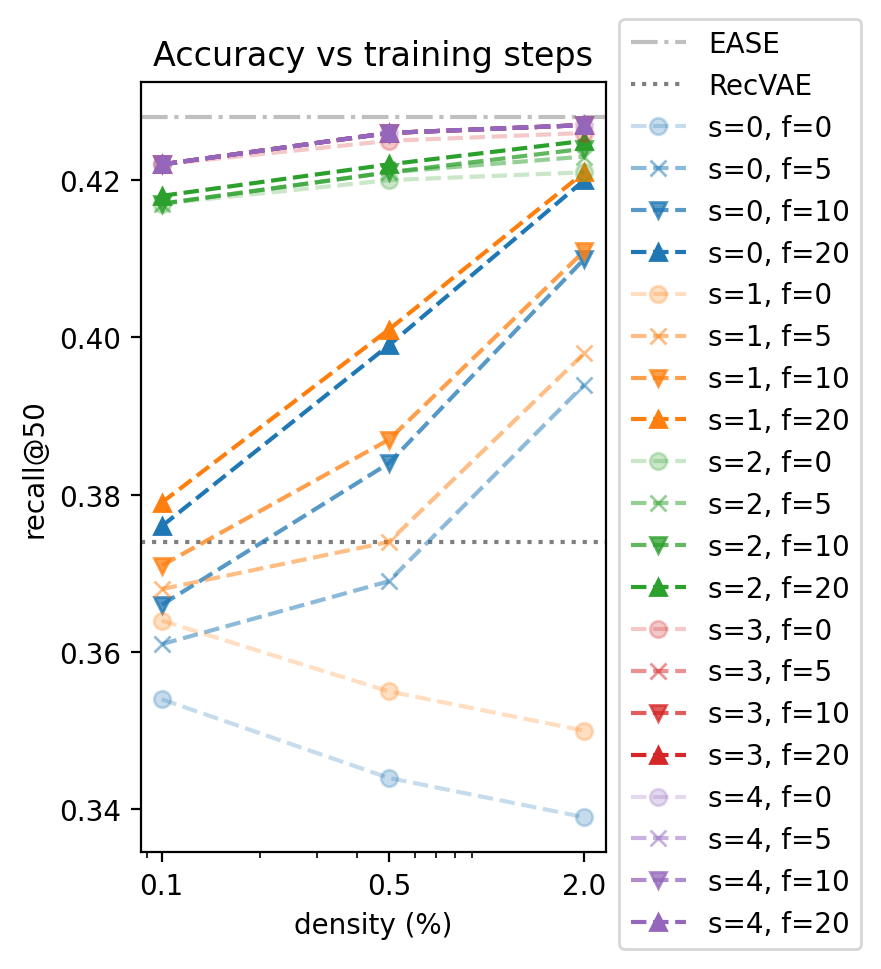

In [16]:
plt.figure(figsize=(3, 5), dpi=200)
# EASE and RecVAE for comparison
plt.axhline(recall50ease, 0, 1, label="EASE", color="black", linestyle="-.", alpha=0.25)
plt.axhline(0.374, 0, 1, label="RecVAE", color="black", linestyle=":", alpha=0.5)
colors = ["C0", "C1", "C2", "C3", "C4"]
markers = ["o", "x", "v", "^"]
alphas = [0.25, 0.5, 0.75, 1]
for ins, ns in enumerate(df["ns"].unique()):
    for inf, nf in enumerate(df["nf"].unique()):
        df_ = df[(df["ns"] == ns) & (df["nf"] == nf)]
        plt.semilogx(
            df_["d (%)"],
            df_["r@50"],
            label=f"s={ns}, f={nf}",
            color=colors[ins],
            marker=markers[inf],
            alpha=alphas[inf],
            linestyle="--",
        )
plt.legend(bbox_to_anchor=(1, 1.1), loc="upper left")
plt.xticks(df["d (%)"].unique(), df["d (%)"].unique())
plt.xlabel("density (%)")
plt.ylabel("recall@50")
plt.title("Accuracy vs training steps")
plt.savefig("accuracy_vs_training_steps.png", bbox_inches="tight")
